# 🌺 K-means Clustering Tutorial: Unsupervised Learning with the Iris Dataset

## **Discover Hidden Patterns in Data with Interactive Clustering Implementation**

### **Main Goal:**
Learn how to group iris flowers into clusters based on their physical measurements using K-means clustering, while understanding every step of the unsupervised learning pipeline through interactive visualizations.

### **Key Learning Objectives:**
- **Clustering Fundamentals**: Understand unsupervised learning and clustering concepts
- **K-means Algorithm**: Learn how the algorithm works and its parameters
- **Optimal Cluster Selection**: Use elbow method and silhouette analysis
- **Cluster Evaluation**: Compare clustering results with true labels
- **3D Visualization**: Explore clusters in multiple dimensions

### **Industrial Relevance:**
Apply to **pattern recognition**, **anomaly detection**, **customer segmentation**, **process optimization**, and **equipment grouping** in industrial applications.

### **Interactive Features:**
🎮 Real-time clustering | 📊 3D cluster visualization | ⚡ Silhouette analysis | 🔬 Cluster center exploration

**Dataset**: Iris flower dataset with 4 features (sepal/petal length/width) - discovering natural groupings

---

## 1. Import Required Libraries

We'll use scikit-learn for clustering, NumPy for numerical operations, and various visualization libraries.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Set styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
np.random.seed(42)

# Configure display
%matplotlib widget
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interactive, IntSlider

print("Libraries imported successfully!")
print("📊 Ready for K-means clustering analysis")

Libraries imported successfully!
📊 Ready for K-means clustering analysis


## 2. Load and Explore the Iris Dataset

Let's load the famous iris dataset and understand its structure for clustering analysis.

🌺 IRIS DATASET OVERVIEW
Dataset shape: (150, 4)
Number of features: 4
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Number of classes: 3
Classes: ['setosa' 'versicolor' 'virginica']

📊 First 5 rows:


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  target  
0  setosa       0  
1  setosa       0  
2  setosa       0  
3  setosa       0  
4  setosa       0


📈 Dataset statistics:


sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000


🏷️ Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


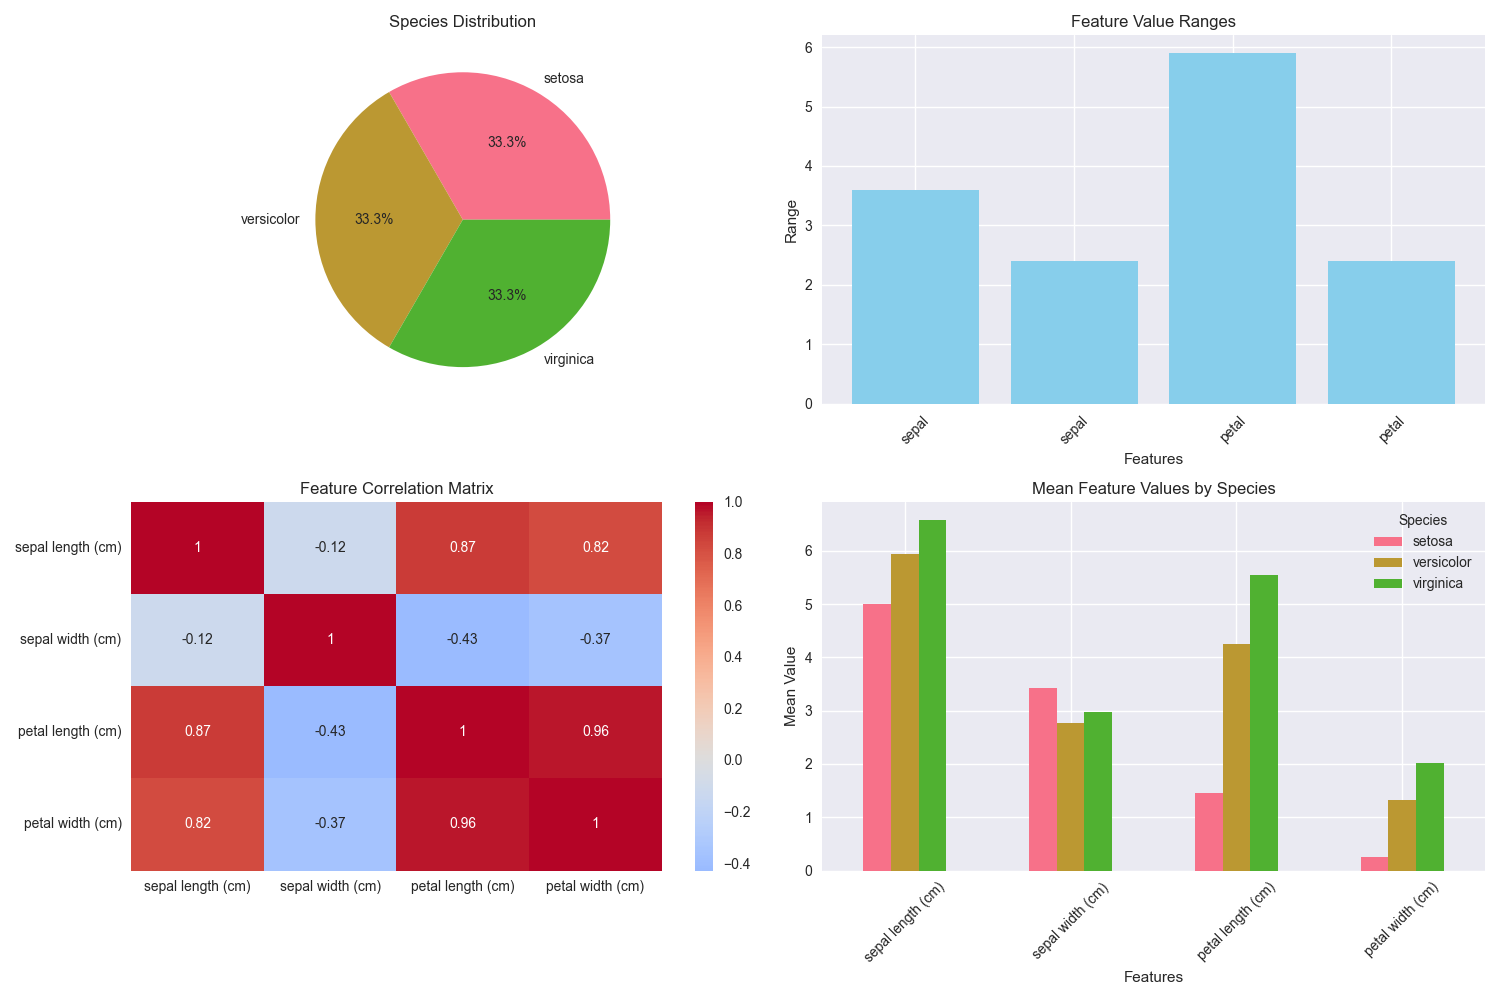

In [21]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create a DataFrame for easier analysis
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in y]
df['target'] = y

print("🌺 IRIS DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {len(feature_names)}")
print(f"Features: {feature_names}")
print(f"Number of classes: {len(target_names)}")
print(f"Classes: {target_names}")

print("\n📊 First 5 rows:")
display(df.head())

print("\n📈 Dataset statistics:")
display(df.describe())

print("\n🏷️ Class distribution:")
class_counts = df['species'].value_counts()
print(class_counts)

# Create a summary visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 5))

# Class distribution pie chart
ax1.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
ax1.set_title('Species Distribution')

# Feature ranges
feature_ranges = df[feature_names].max() - df[feature_names].min()
ax2.bar(range(len(feature_names)), feature_ranges, color='skyblue')
ax2.set_xlabel('Features')
ax2.set_ylabel('Range')
ax2.set_title('Feature Value Ranges')
ax2.set_xticks(range(len(feature_names)))
ax2.set_xticklabels([name.split()[0] for name in feature_names], rotation=45)

# Correlation matrix
corr_matrix = df[feature_names].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax3)
ax3.set_title('Feature Correlation Matrix')

# Feature means by species
species_means = df.groupby('species')[feature_names].mean()
species_means.T.plot(kind='bar', ax=ax4)
ax4.set_title('Mean Feature Values by Species')
ax4.set_xlabel('Features')
ax4.set_ylabel('Mean Value')
ax4.legend(title='Species')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3. Data Visualization and Exploration

Let's visualize the data to understand the natural groupings and relationships between features.

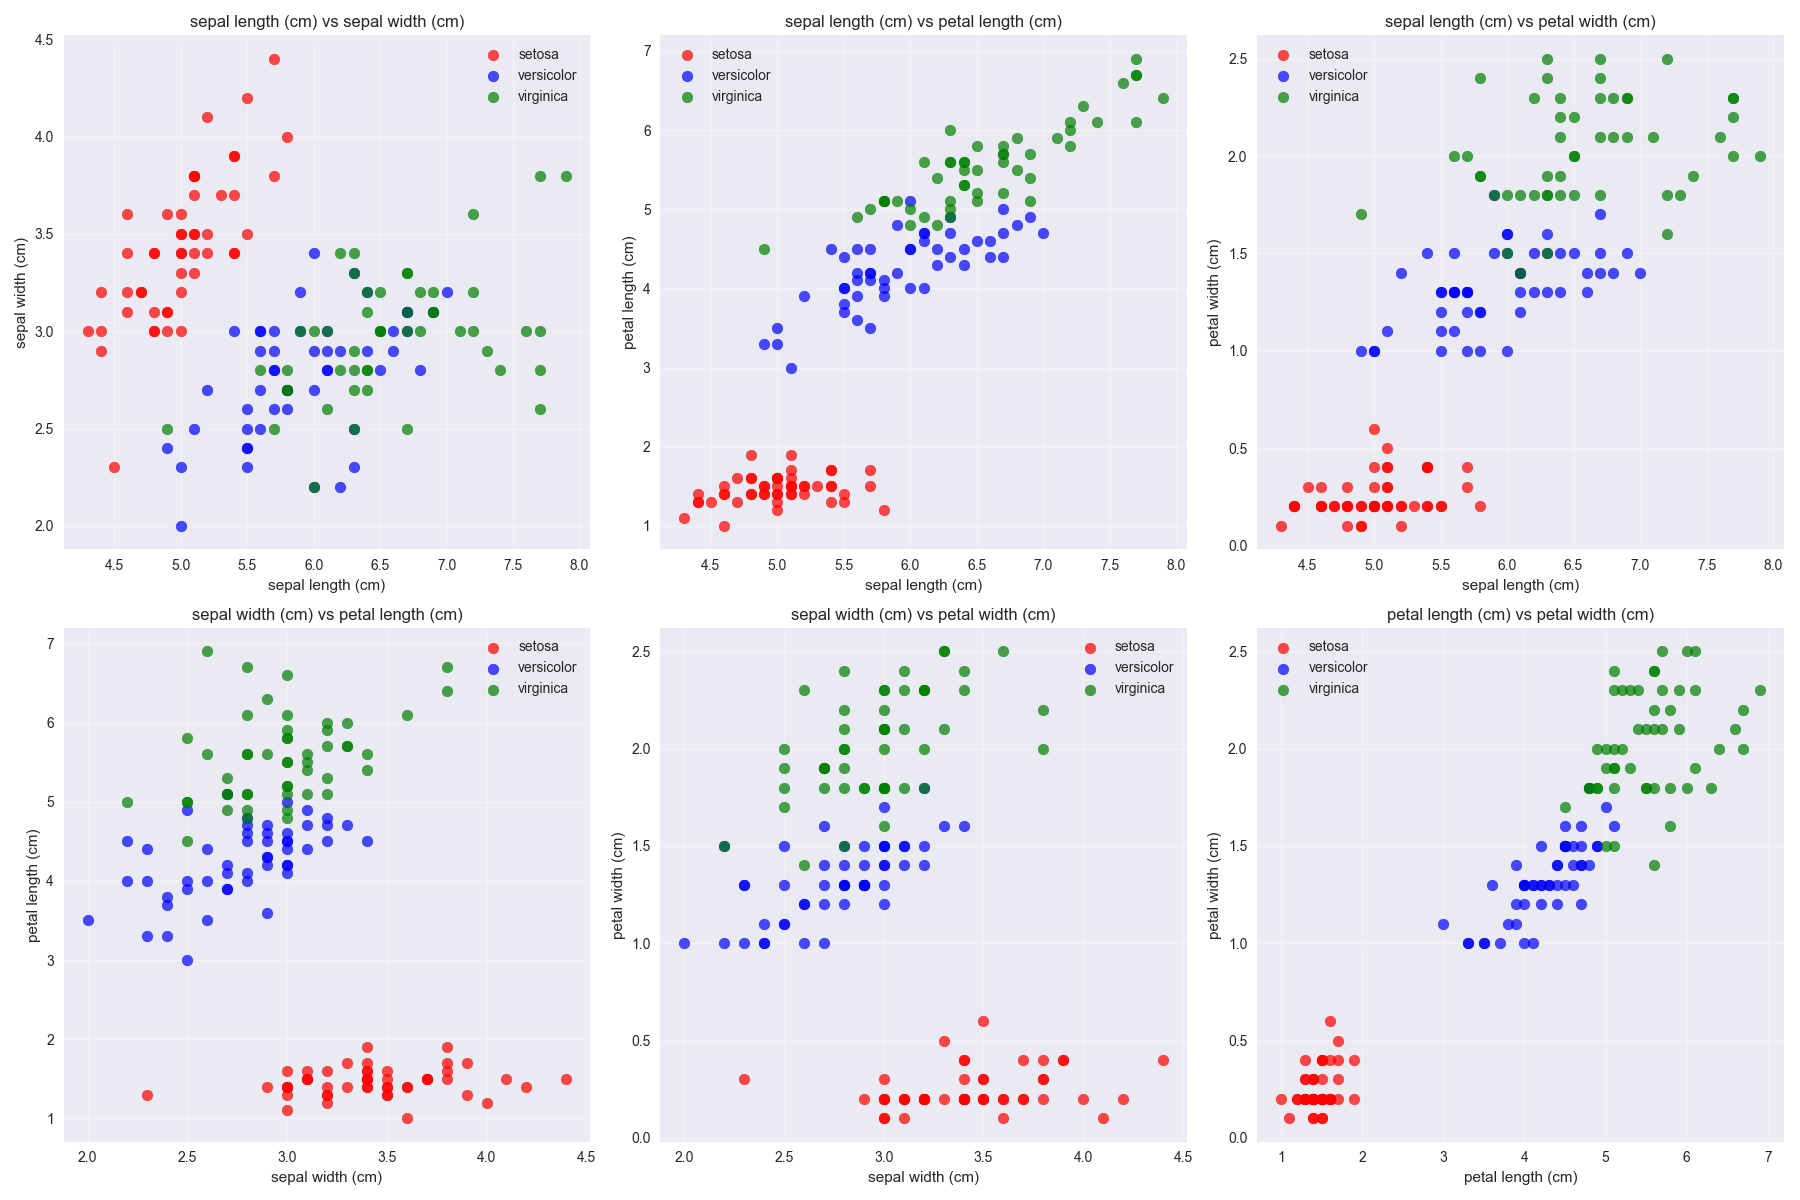

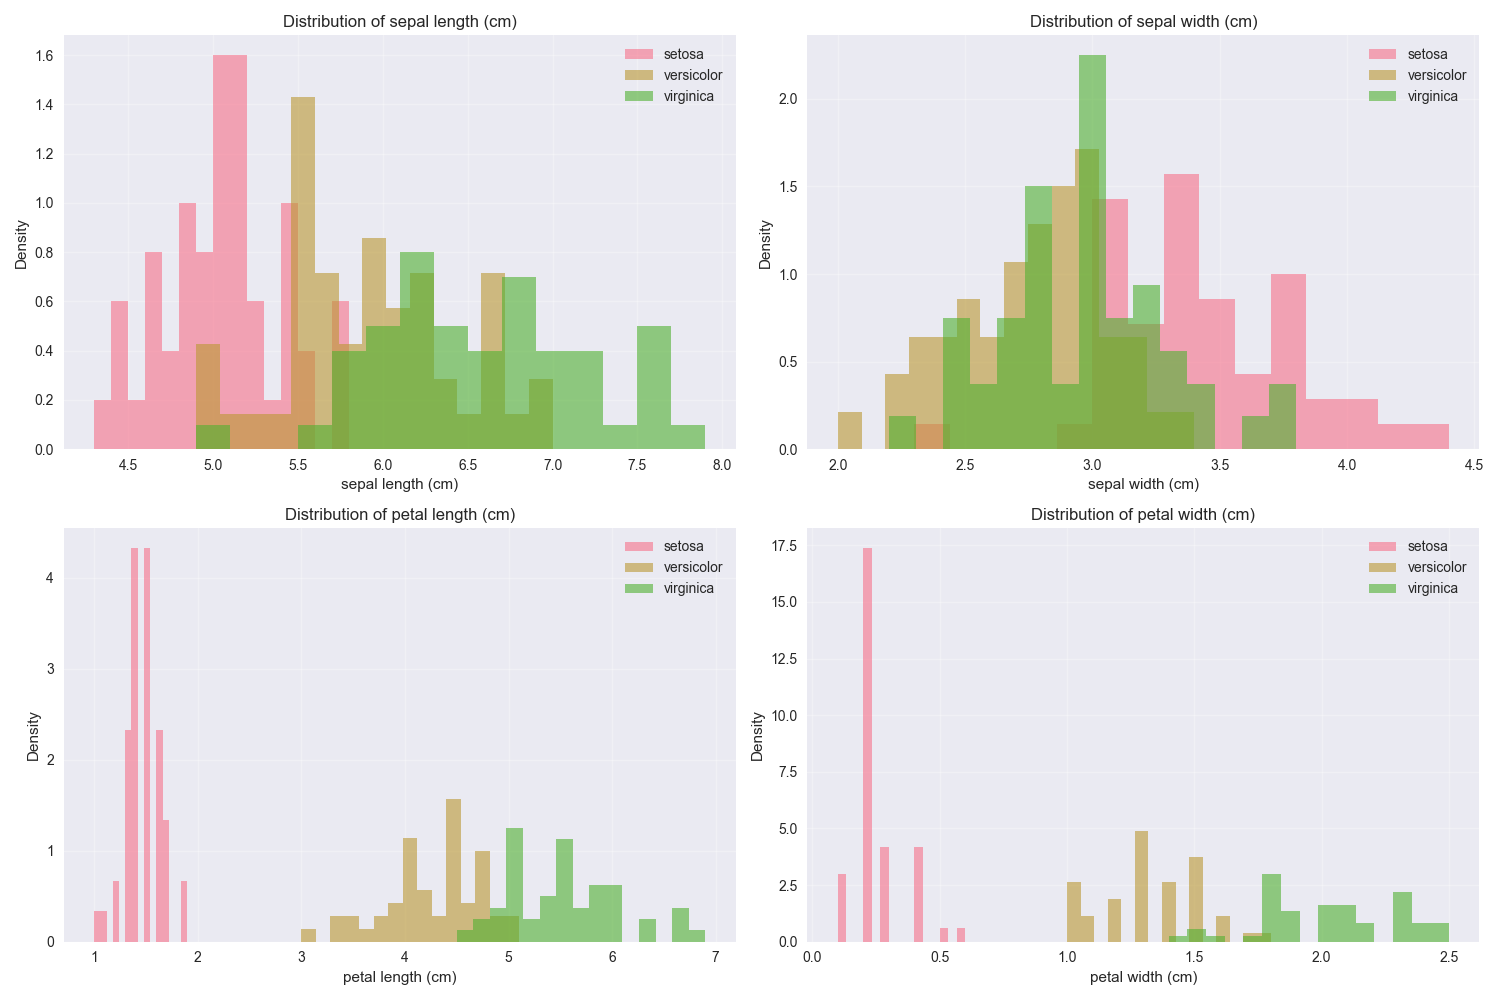

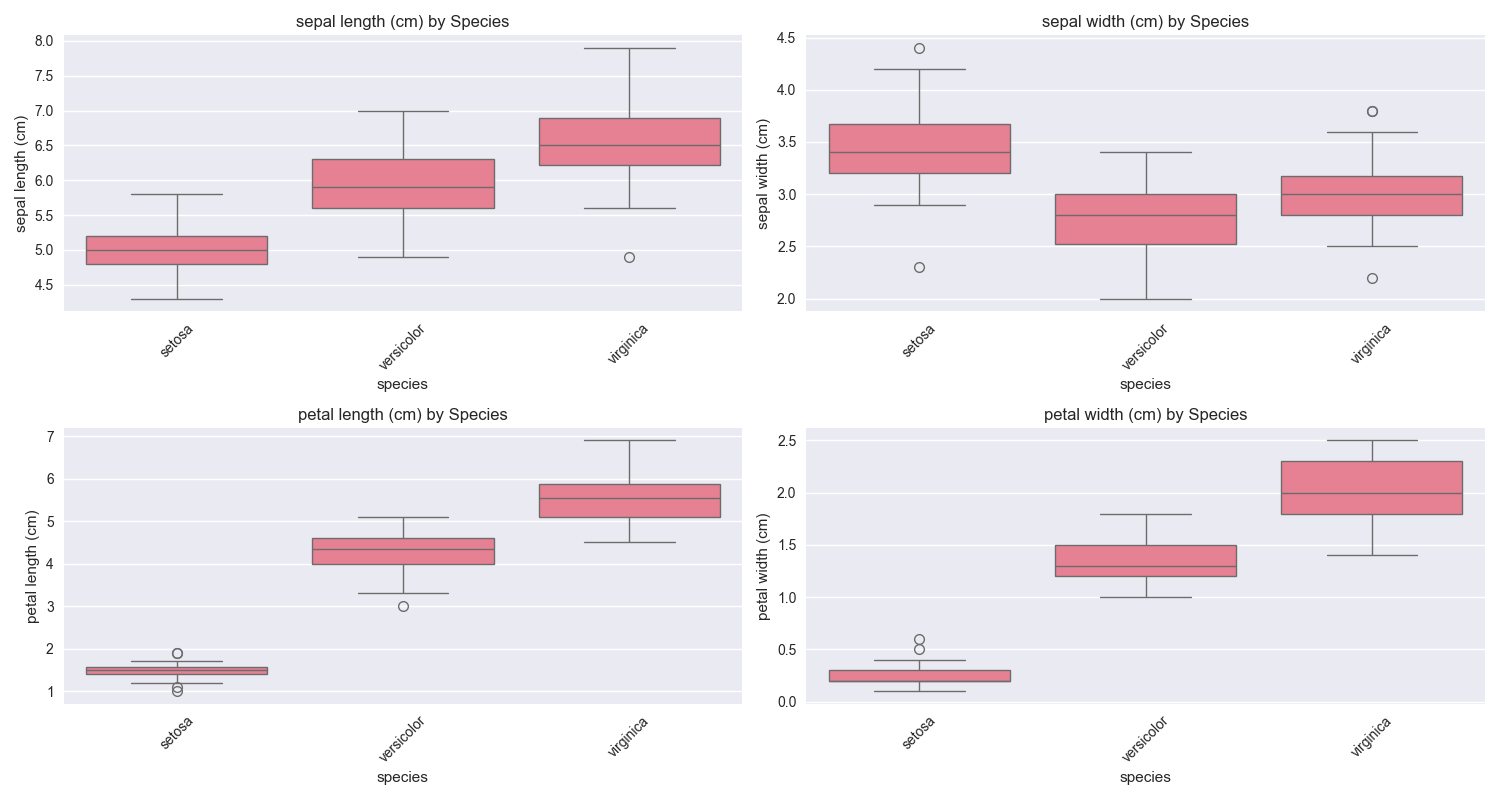

📊 Key Observations from Data Exploration:
✅ Setosa appears well-separated from other species
✅ Petal length and width show strong discriminative power
✅ Versicolor and Virginica overlap in some feature spaces
✅ Features show different scales - normalization may be beneficial
✅ Natural groupings are visible in 2D projections


In [22]:
# Create pairwise scatter plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Color mapping for species
colors = ['red', 'blue', 'green']
species_colors = {species: colors[i] for i, species in enumerate(target_names)}

# Feature pairs for visualization
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

for idx, (feat1, feat2) in enumerate(feature_pairs):
    ax = axes[idx]
    
    for species in target_names:
        mask = df['species'] == species
        ax.scatter(df[mask].iloc[:, feat1], df[mask].iloc[:, feat2], 
                  c=species_colors[species], label=species, alpha=0.7, s=60)
    
    ax.set_xlabel(feature_names[feat1])
    ax.set_ylabel(feature_names[feat2])
    ax.set_title(f'{feature_names[feat1]} vs {feature_names[feat2]}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(7, 5))
axes = axes.ravel()

for i, feature in enumerate(feature_names):
    ax = axes[i]
    
    for species in target_names:
        species_data = df[df['species'] == species][feature]
        ax.hist(species_data, alpha=0.6, label=species, bins=15, density=True)
    
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {feature}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Box plots for feature comparison
plt.figure(figsize=(15, 8))
for i, feature in enumerate(feature_names, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='species', y=feature)
    plt.title(f'{feature} by Species')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("📊 Key Observations from Data Exploration:")
print("=" * 50)
print("✅ Setosa appears well-separated from other species")
print("✅ Petal length and width show strong discriminative power")
print("✅ Versicolor and Virginica overlap in some feature spaces")
print("✅ Features show different scales - normalization may be beneficial")
print("✅ Natural groupings are visible in 2D projections")

## 4. Implement K-means Clustering

Now let's apply K-means clustering to discover patterns in the data without using the species labels.

In [23]:
# Standardize the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("🔄 Data Preprocessing:")
print("=" * 30)
print(f"Original data shape: {X.shape}")
print(f"Scaled data shape: {X_scaled.shape}")
print(f"Feature means after scaling: {X_scaled.mean(axis=0).round(3)}")
print(f"Feature std after scaling: {X_scaled.std(axis=0).round(3)}")

# Apply K-means with different numbers of clusters
k_values = [2, 3, 4, 5]
kmeans_results = {}

print("\n🎯 K-means Clustering Results:")
print("=" * 40)

for k in k_values:
    # Fit K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    
    # Store results
    kmeans_results[k] = {
        'model': kmeans,
        'labels': cluster_labels,
        'centers': kmeans.cluster_centers_,
        'inertia': kmeans.inertia_,
        'silhouette': silhouette_avg
    }
    
    print(f"K={k}: Silhouette Score = {silhouette_avg:.3f}, Inertia = {kmeans.inertia_:.2f}")

# Focus on K=3 (expected number of species)
k_optimal = 3
kmeans_3 = kmeans_results[k_optimal]['model']
cluster_labels_3 = kmeans_results[k_optimal]['labels']
cluster_centers_3 = kmeans_results[k_optimal]['centers']

print(f"\n🎯 Detailed Results for K={k_optimal}:")
print("=" * 35)
print(f"Silhouette Score: {kmeans_results[k_optimal]['silhouette']:.3f}")
print(f"Inertia (sum of squared distances): {kmeans_results[k_optimal]['inertia']:.2f}")
print(f"Number of iterations: {kmeans_3.n_iter_}")

# Display cluster centers (scaled)
print(f"\n📍 Cluster Centers (standardized features):")
centers_df = pd.DataFrame(cluster_centers_3, columns=feature_names)
centers_df.index = [f'Cluster {i}' for i in range(k_optimal)]
display(centers_df.round(3))

# Transform back to original scale for interpretation
centers_original = scaler.inverse_transform(cluster_centers_3)
print(f"\n📍 Cluster Centers (original scale):")
centers_orig_df = pd.DataFrame(centers_original, columns=feature_names)
centers_orig_df.index = [f'Cluster {i}' for i in range(k_optimal)]
display(centers_orig_df.round(3))

# Add cluster labels to DataFrame
df_clustered = df.copy()
df_clustered['cluster'] = cluster_labels_3

print(f"\n📊 Cluster Size Distribution:")
cluster_counts = pd.Series(cluster_labels_3).value_counts().sort_index()
print(cluster_counts)

🔄 Data Preprocessing:
Original data shape: (150, 4)
Scaled data shape: (150, 4)
Feature means after scaling: [-0. -0. -0. -0.]
Feature std after scaling: [1. 1. 1. 1.]

🎯 K-means Clustering Results:
K=2: Silhouette Score = 0.582, Inertia = 222.36
K=3: Silhouette Score = 0.460, Inertia = 139.82
K=4: Silhouette Score = 0.387, Inertia = 114.09
K=5: Silhouette Score = 0.346, Inertia = 90.93

🎯 Detailed Results for K=3:
Silhouette Score: 0.460
Inertia (sum of squared distances): 139.82
Number of iterations: 4

📍 Cluster Centers (standardized features):


sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster 0             -0.050            -0.883              0.348   
Cluster 1             -1.015             0.853             -1.305   
Cluster 2              1.136             0.088              0.996   

           petal width (cm)  
Cluster 0             0.282  
Cluster 1            -1.255  
Cluster 2             1.018


📍 Cluster Centers (original scale):


sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster 0              5.802             2.674              4.370   
Cluster 1              5.006             3.428              1.462   
Cluster 2              6.781             3.096              5.511   

           petal width (cm)  
Cluster 0             1.413  
Cluster 1             0.246  
Cluster 2             1.972


📊 Cluster Size Distribution:
0    53
1    50
2    47
Name: count, dtype: int64


## 5. Determine Optimal Number of Clusters

Let's use the elbow method and silhouette analysis to find the optimal number of clusters.

🔍 Searching for Optimal Number of Clusters...
K=2: Inertia=222.36, Silhouette=0.582
K=3: Inertia=139.82, Silhouette=0.460
K=4: Inertia=114.09, Silhouette=0.387
K=5: Inertia=90.93, Silhouette=0.346
K=6: Inertia=81.54, Silhouette=0.317
K=7: Inertia=72.63, Silhouette=0.320
K=8: Inertia=62.54, Silhouette=0.339
K=9: Inertia=55.12, Silhouette=0.342
K=10: Inertia=47.39, Silhouette=0.352


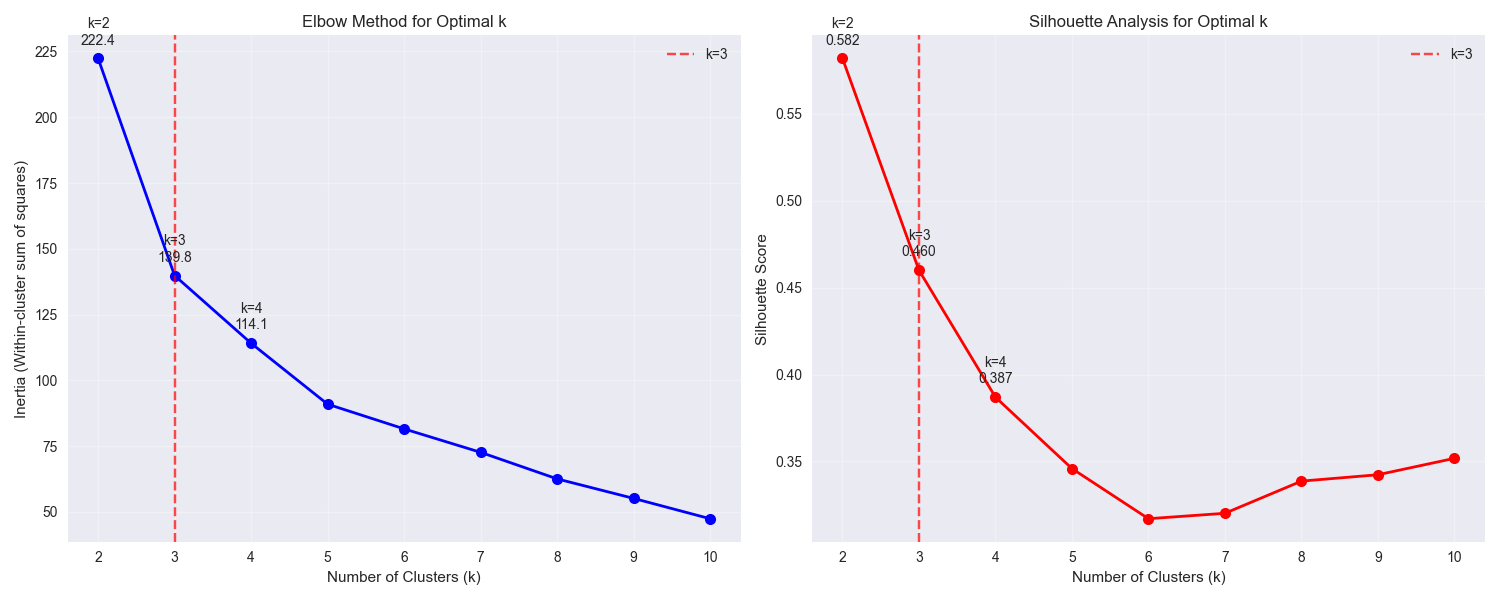


📊 CLUSTER OPTIMIZATION RESULTS:
🔵 Elbow method suggests: k = 2
🔴 Best silhouette score: k = 2 (score: 0.582)
🎯 Biological expectation: k = 3 (three iris species)


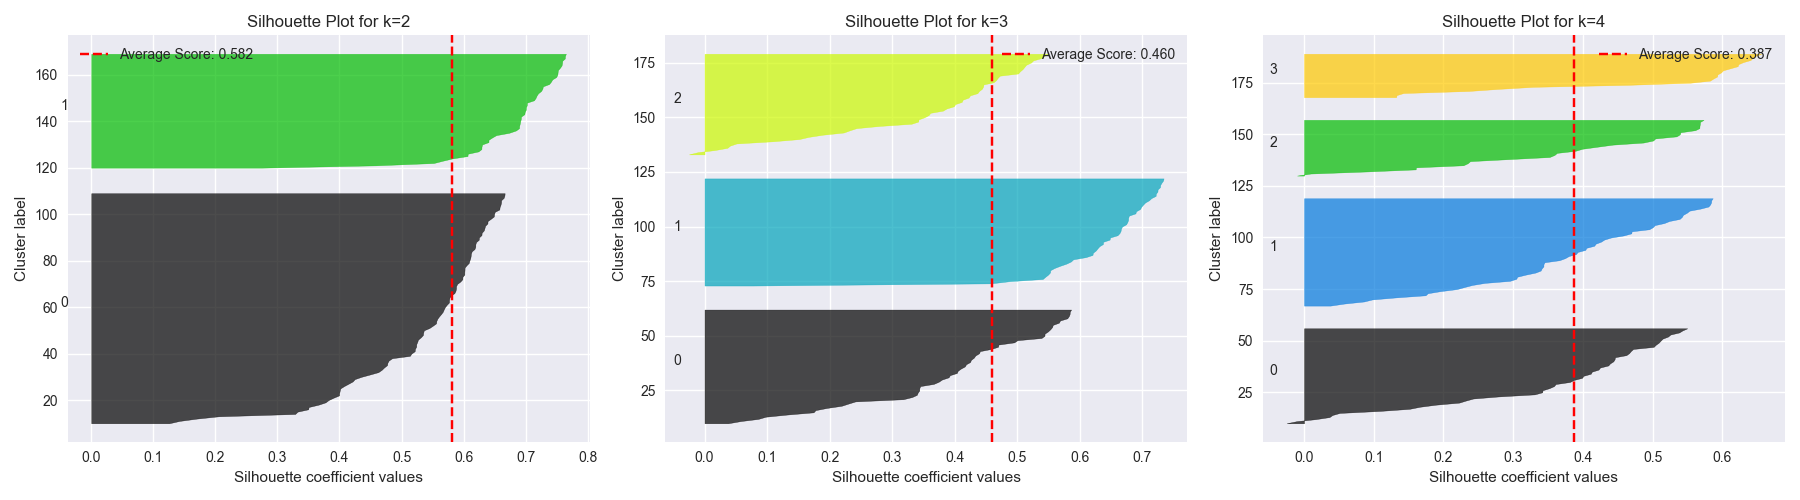

In [24]:
# Extended range for cluster optimization
k_range = range(2, 11)
inertias = []
silhouette_scores = []

print("🔍 Searching for Optimal Number of Clusters...")
print("=" * 50)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_avg:.3f}")

# Create elbow and silhouette plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

# Elbow Method Plot
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Within-cluster sum of squares)')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='k=3')
ax1.legend()

# Add annotations for key points
for i, (k, inertia) in enumerate(zip(k_range, inertias)):
    if k in [2, 3, 4]:
        ax1.annotate(f'k={k}\n{inertia:.1f}', 
                    (k, inertia), 
                    textcoords="offset points", 
                    xytext=(0,10), 
                    ha='center')

# Silhouette Score Plot
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis for Optimal k')
ax2.grid(True, alpha=0.3)
ax2.axvline(x=3, color='red', linestyle='--', alpha=0.7, label='k=3')
ax2.legend()

# Add annotations for key points
for i, (k, score) in enumerate(zip(k_range, silhouette_scores)):
    if k in [2, 3, 4]:
        ax2.annotate(f'k={k}\n{score:.3f}', 
                    (k, score), 
                    textcoords="offset points", 
                    xytext=(0,10), 
                    ha='center')

plt.tight_layout()
plt.show()

# Calculate elbow point using second derivative
def calculate_elbow_point(inertias):
    """Calculate the elbow point using second derivative"""
    if len(inertias) < 3:
        return None
    
    # Calculate first and second derivatives
    first_diff = np.diff(inertias)
    second_diff = np.diff(first_diff)
    
    # Find the point where second derivative is maximum
    elbow_idx = np.argmax(second_diff) + 2  # +2 because of double diff
    return elbow_idx

elbow_k = calculate_elbow_point(inertias)
best_silhouette_k = k_range[np.argmax(silhouette_scores)]

print(f"\n📊 CLUSTER OPTIMIZATION RESULTS:")
print("=" * 40)
print(f"🔵 Elbow method suggests: k = {elbow_k}")
print(f"🔴 Best silhouette score: k = {best_silhouette_k} (score: {max(silhouette_scores):.3f})")
print(f"🎯 Biological expectation: k = 3 (three iris species)")

# Detailed silhouette analysis for k=2,3,4
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, k in enumerate([2, 3, 4]):
    ax = axes[idx]
    
    # Fit K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Calculate silhouette scores for each sample
    sample_silhouette_values = silhouette_score(X_scaled, cluster_labels, sample_size=None)
    
    # Create silhouette plot
    from sklearn.metrics import silhouette_samples
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)
    
    y_lower = 10
    for i in range(k):
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()
        
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                        0, cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
        
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax.set_xlabel('Silhouette coefficient values')
    ax.set_ylabel('Cluster label')
    ax.set_title(f'Silhouette Plot for k={k}')
    
    # Add average silhouette score line
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    ax.axvline(x=silhouette_avg, color="red", linestyle="--", 
               label=f'Average Score: {silhouette_avg:.3f}')
    ax.legend()

plt.tight_layout()
plt.show()

## 6. Visualize Clustering Results

Let's create 2D scatter plots showing cluster assignments with different colors and visualize cluster centers.

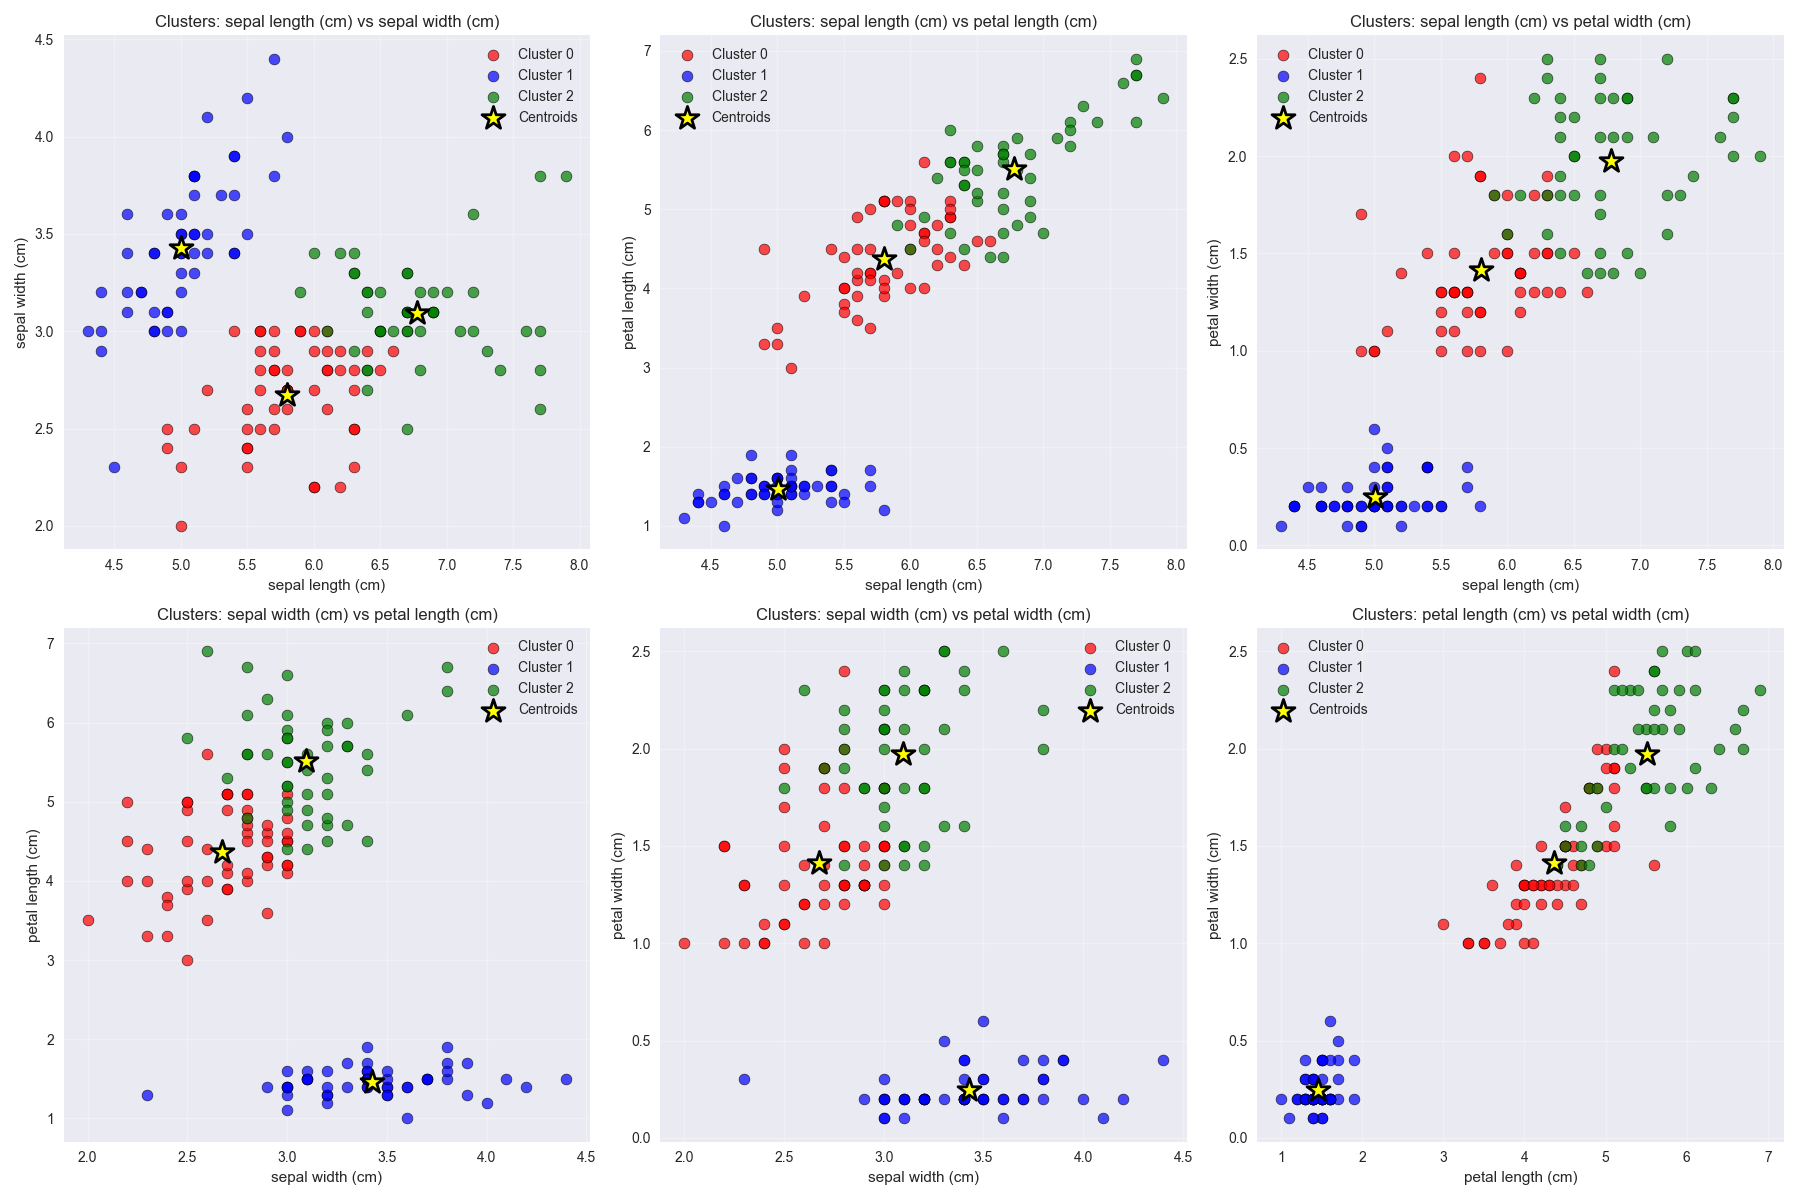

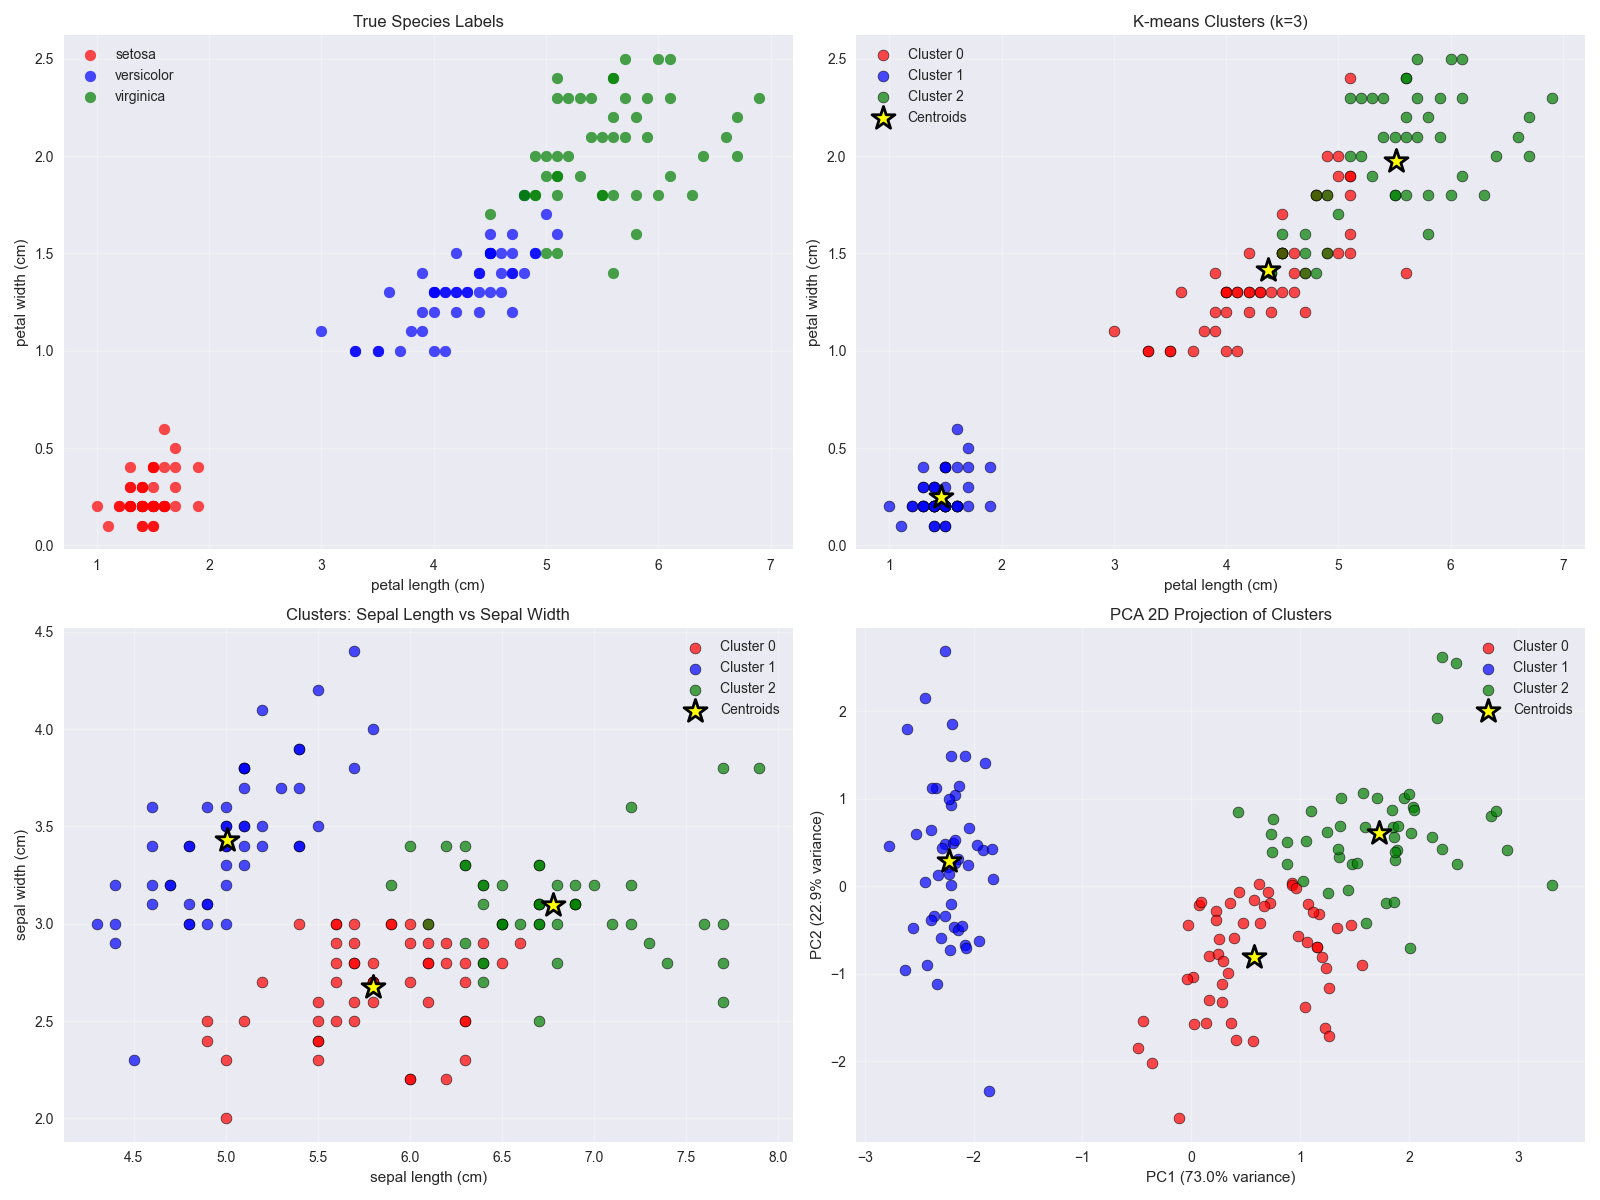

📊 PCA Analysis:
   PC1 explains 73.0% of variance
   PC2 explains 22.9% of variance
   Total variance explained: 95.8%

📋 Cluster Characteristics (k=3):

🔹 Cluster 0 (n=53):
   Mean values:
     sepal length (cm): 5.80
     sepal width (cm): 2.67
     petal length (cm): 4.37
     petal width (cm): 1.41
   Standard deviations:
     sepal length (cm): 0.40
     sepal width (cm): 0.25
     petal length (cm): 0.56
     petal width (cm): 0.31

🔹 Cluster 1 (n=50):
   Mean values:
     sepal length (cm): 5.01
     sepal width (cm): 3.43
     petal length (cm): 1.46
     petal width (cm): 0.25
   Standard deviations:
     sepal length (cm): 0.35
     sepal width (cm): 0.38
     petal length (cm): 0.17
     petal width (cm): 0.10

🔹 Cluster 2 (n=47):
   Mean values:
     sepal length (cm): 6.78
     sepal width (cm): 3.10
     petal length (cm): 5.51
     petal width (cm): 1.97
   Standard deviations:
     sepal length (cm): 0.49
     sepal width (cm): 0.26
     petal length (cm): 0.63
     pet

In [25]:
# Visualize clustering results for k=3
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Color maps for clusters
cluster_colors = ['red', 'blue', 'green', 'purple', 'orange']
feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

for idx, (feat1, feat2) in enumerate(feature_pairs):
    ax = axes[idx]
    
    # Plot data points colored by cluster
    for cluster in range(3):
        mask = cluster_labels_3 == cluster
        ax.scatter(X[mask, feat1], X[mask, feat2], 
                  c=cluster_colors[cluster], label=f'Cluster {cluster}', 
                  alpha=0.7, s=60, edgecolors='black', linewidths=0.5)
    
    # Plot cluster centers (transformed back to original scale)
    centers_orig = scaler.inverse_transform(cluster_centers_3)
    ax.scatter(centers_orig[:, feat1], centers_orig[:, feat2], 
              c='yellow', s=300, marker='*', edgecolors='black', 
              linewidths=2, label='Centroids')
    
    ax.set_xlabel(feature_names[feat1])
    ax.set_ylabel(feature_names[feat2])
    ax.set_title(f'Clusters: {feature_names[feat1]} vs {feature_names[feat2]}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Create a comparison plot: Original species vs Clusters
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Most discriminative features: petal length vs petal width
feat1, feat2 = 2, 3  # petal length, petal width

# Plot 1: True species labels
ax1 = axes[0, 0]
for i, species in enumerate(target_names):
    mask = y == i
    ax1.scatter(X[mask, feat1], X[mask, feat2], 
               c=colors[i], label=species, alpha=0.7, s=60)
ax1.set_xlabel(feature_names[feat1])
ax1.set_ylabel(feature_names[feat2])
ax1.set_title('True Species Labels')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: K-means clusters
ax2 = axes[0, 1]
for cluster in range(3):
    mask = cluster_labels_3 == cluster
    ax2.scatter(X[mask, feat1], X[mask, feat2], 
               c=cluster_colors[cluster], label=f'Cluster {cluster}', 
               alpha=0.7, s=60, edgecolors='black', linewidths=0.5)
centers_orig = scaler.inverse_transform(cluster_centers_3)
ax2.scatter(centers_orig[:, feat1], centers_orig[:, feat2], 
           c='yellow', s=300, marker='*', edgecolors='black', 
           linewidths=2, label='Centroids')
ax2.set_xlabel(feature_names[feat1])
ax2.set_ylabel(feature_names[feat2])
ax2.set_title('K-means Clusters (k=3)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Sepal length vs sepal width
feat1, feat2 = 0, 1
ax3 = axes[1, 0]
for cluster in range(3):
    mask = cluster_labels_3 == cluster
    ax3.scatter(X[mask, feat1], X[mask, feat2], 
               c=cluster_colors[cluster], label=f'Cluster {cluster}', 
               alpha=0.7, s=60, edgecolors='black', linewidths=0.5)
ax3.scatter(centers_orig[:, feat1], centers_orig[:, feat2], 
           c='yellow', s=300, marker='*', edgecolors='black', 
           linewidths=2, label='Centroids')
ax3.set_xlabel(feature_names[feat1])
ax3.set_ylabel(feature_names[feat2])
ax3.set_title('Clusters: Sepal Length vs Sepal Width')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: PCA 2D visualization
ax4 = axes[1, 1]
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

for cluster in range(3):
    mask = cluster_labels_3 == cluster
    ax4.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=cluster_colors[cluster], label=f'Cluster {cluster}', 
               alpha=0.7, s=60, edgecolors='black', linewidths=0.5)

# Transform cluster centers to PCA space
centers_pca = pca.transform(cluster_centers_3)
ax4.scatter(centers_pca[:, 0], centers_pca[:, 1], 
           c='yellow', s=300, marker='*', edgecolors='black', 
           linewidths=2, label='Centroids')

ax4.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)')
ax4.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)')
ax4.set_title('PCA 2D Projection of Clusters')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 PCA Analysis:")
print(f"   PC1 explains {pca.explained_variance_ratio_[0]:.1%} of variance")
print(f"   PC2 explains {pca.explained_variance_ratio_[1]:.1%} of variance")
print(f"   Total variance explained: {pca.explained_variance_ratio_.sum():.1%}")

# Cluster characteristics analysis
print(f"\n📋 Cluster Characteristics (k=3):")
print("=" * 50)

for cluster in range(3):
    mask = cluster_labels_3 == cluster
    cluster_data = X[mask]
    
    print(f"\n🔹 Cluster {cluster} (n={np.sum(mask)}):")
    print("   Mean values:")
    for i, feature in enumerate(feature_names):
        mean_val = cluster_data[:, i].mean()
        print(f"     {feature}: {mean_val:.2f}")
    
    print("   Standard deviations:")
    for i, feature in enumerate(feature_names):
        std_val = cluster_data[:, i].std()
        print(f"     {feature}: {std_val:.2f}")

## 7. Compare Clusters with True Species Labels

Let's compare the clustering results with the actual iris species labels to evaluate performance.

🔍 CLUSTER vs SPECIES COMPARISON
Rows: Clusters | Columns: True Species


setosa  versicolor  virginica
Cluster 0       0          39         14
Cluster 1      50           0          0
Cluster 2       0          11         36

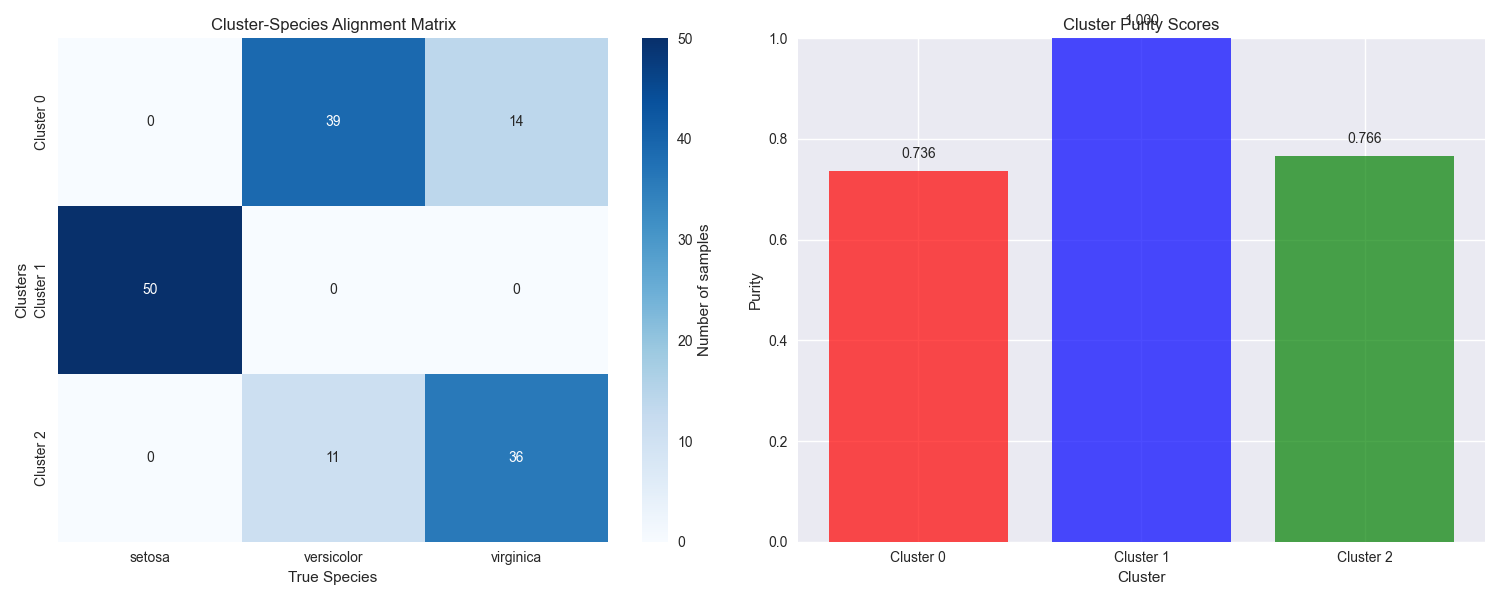


🎯 CLUSTER-SPECIES MAPPING ANALYSIS:
Cluster 0:
  📊 Size: 53 samples
  🏷️  Dominant species: versicolor (39/53 = 73.6%)
  🎯 Purity: 0.736
  📋 Species distribution:
     setosa: 0 (0.0%)
     versicolor: 39 (73.6%)
     virginica: 14 (26.4%)

Cluster 1:
  📊 Size: 50 samples
  🏷️  Dominant species: setosa (50/50 = 100.0%)
  🎯 Purity: 1.000
  📋 Species distribution:
     setosa: 50 (100.0%)
     versicolor: 0 (0.0%)
     virginica: 0 (0.0%)

Cluster 2:
  📊 Size: 47 samples
  🏷️  Dominant species: virginica (36/47 = 76.6%)
  🎯 Purity: 0.766
  📋 Species distribution:
     setosa: 0 (0.0%)
     versicolor: 11 (23.4%)
     virginica: 36 (76.6%)

📈 CLUSTERING QUALITY METRICS:
🎯 Adjusted Rand Index: 0.620
🔄 Normalized Mutual Information: 0.659
🏠 Homogeneity Score: 0.659
✅ Completeness Score: 0.660
📊 V-measure Score: 0.659
🔵 Silhouette Score: 0.460

📝 INTERPRETATION:
• Adjusted Rand Index: 1.0 = perfect clustering, 0.0 = random
• Homogeneity: All clusters contain only members of a single class
•

In [26]:
# Create confusion matrix-like comparison
def create_cluster_species_matrix(cluster_labels, true_labels, cluster_names, species_names):
    """Create a matrix showing how clusters align with true species"""
    matrix = np.zeros((len(cluster_names), len(species_names)))
    
    for i, cluster in enumerate(cluster_names):
        for j, species in enumerate(species_names):
            count = np.sum((cluster_labels == i) & (true_labels == j))
            matrix[i, j] = count
    
    return matrix

def find_best_mapping(true_labels, cluster_labels):
    """Find the best mapping between clusters and true labels"""
    from scipy.optimize import linear_sum_assignment
    
    # Create cost matrix
    n_clusters = len(np.unique(cluster_labels))
    n_classes = len(np.unique(true_labels))
    
    cost_matrix = np.zeros((n_clusters, n_classes))
    for i in range(n_clusters):
        for j in range(n_classes):
            # Cost is negative count (we want to maximize overlap)
            cost_matrix[i, j] = -np.sum((cluster_labels == i) & (true_labels == j))
    
    row_indices, col_indices = linear_sum_assignment(cost_matrix)
    mapping = dict(zip(row_indices, col_indices))
    return mapping

# Create comparison matrix
cluster_species_matrix = create_cluster_species_matrix(
    cluster_labels_3, y, range(3), range(3)
)

# Display as DataFrame for better readability
comparison_df = pd.DataFrame(
    cluster_species_matrix.astype(int),
    index=[f'Cluster {i}' for i in range(3)],
    columns=target_names
)

print("🔍 CLUSTER vs SPECIES COMPARISON")
print("=" * 45)
print("Rows: Clusters | Columns: True Species")
display(comparison_df)

# Visualize the comparison matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

# Heatmap of cluster-species alignment
sns.heatmap(comparison_df, annot=True, fmt='d', cmap='Blues', 
            cbar_kws={'label': 'Number of samples'}, ax=ax1)
ax1.set_title('Cluster-Species Alignment Matrix')
ax1.set_ylabel('Clusters')
ax1.set_xlabel('True Species')

# Calculate purity for each cluster
cluster_purities = []
for i in range(3):
    cluster_counts = comparison_df.iloc[i].values
    total_in_cluster = cluster_counts.sum()
    max_species_in_cluster = cluster_counts.max()
    purity = max_species_in_cluster / total_in_cluster if total_in_cluster > 0 else 0
    cluster_purities.append(purity)

ax2.bar(range(3), cluster_purities, color=['red', 'blue', 'green'], alpha=0.7)
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Purity')
ax2.set_title('Cluster Purity Scores')
ax2.set_xticks(range(3))
ax2.set_xticklabels([f'Cluster {i}' for i in range(3)])
ax2.set_ylim(0, 1)

# Add value labels on bars
for i, purity in enumerate(cluster_purities):
    ax2.text(i, purity + 0.02, f'{purity:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Find the best cluster-to-species mapping
print(f"\n🎯 CLUSTER-SPECIES MAPPING ANALYSIS:")
print("=" * 45)

for i in range(3):
    cluster_counts = comparison_df.iloc[i].values
    dominant_species_idx = np.argmax(cluster_counts)
    dominant_species = target_names[dominant_species_idx]
    cluster_size = cluster_counts.sum()
    dominant_count = cluster_counts[dominant_species_idx]
    purity = dominant_count / cluster_size
    
    print(f"Cluster {i}:")
    print(f"  📊 Size: {cluster_size} samples")
    print(f"  🏷️  Dominant species: {dominant_species} ({dominant_count}/{cluster_size} = {purity:.1%})")
    print(f"  🎯 Purity: {purity:.3f}")
    
    # Show distribution within cluster
    print(f"  📋 Species distribution:")
    for j, species in enumerate(target_names):
        count = cluster_counts[j]
        percentage = count / cluster_size * 100
        print(f"     {species}: {count} ({percentage:.1f}%)")
    print()

# Calculate overall clustering quality metrics
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

ari_score = adjusted_rand_score(y, cluster_labels_3)
nmi_score = normalized_mutual_info_score(y, cluster_labels_3)
homogeneity = homogeneity_score(y, cluster_labels_3)
completeness = completeness_score(y, cluster_labels_3)
v_measure = v_measure_score(y, cluster_labels_3)

print(f"📈 CLUSTERING QUALITY METRICS:")
print("=" * 35)
print(f"🎯 Adjusted Rand Index: {ari_score:.3f}")
print(f"🔄 Normalized Mutual Information: {nmi_score:.3f}")
print(f"🏠 Homogeneity Score: {homogeneity:.3f}")
print(f"✅ Completeness Score: {completeness:.3f}")
print(f"📊 V-measure Score: {v_measure:.3f}")
print(f"🔵 Silhouette Score: {silhouette_score(X_scaled, cluster_labels_3):.3f}")

print(f"\n📝 INTERPRETATION:")
print("=" * 20)
print("• Adjusted Rand Index: 1.0 = perfect clustering, 0.0 = random")
print("• Homogeneity: All clusters contain only members of a single class")
print("• Completeness: All members of a given class are assigned to the same cluster")
print("• V-measure: Harmonic mean of homogeneity and completeness")

best_mapping = find_best_mapping(y, cluster_labels_3)
print(f"\n🗺️  OPTIMAL CLUSTER-TO-SPECIES MAPPING:")
print("=" * 40)
for cluster, species_idx in best_mapping.items():
    print(f"Cluster {cluster} → {target_names[species_idx]}")

# Calculate accuracy with best mapping
mapped_predictions = [best_mapping[cluster] for cluster in cluster_labels_3]
accuracy = np.mean(np.array(mapped_predictions) == y)
print(f"\n🎯 Clustering Accuracy (with optimal mapping): {accuracy:.1%}")

## 9. Clustering Performance Evaluation

Let's calculate and display comprehensive clustering metrics to evaluate our K-means performance.

🔍 COMPREHENSIVE CLUSTERING EVALUATION

K = 2:
  Silhouette Score: 0.5818
  Adjusted Rand Index: 0.5681
  Homogeneity: 0.5794
  Completeness: 1.0000
  V-measure: 0.7337
  Inertia: 222.36

K = 3:
  Silhouette Score: 0.4599
  Adjusted Rand Index: 0.6201
  Homogeneity: 0.6591
  Completeness: 0.6598
  V-measure: 0.6595
  Inertia: 139.82

K = 4:
  Silhouette Score: 0.3869
  Adjusted Rand Index: 0.4728
  Homogeneity: 0.6591
  Completeness: 0.5461
  V-measure: 0.5973
  Inertia: 114.09

K = 5:
  Silhouette Score: 0.3459
  Adjusted Rand Index: 0.4348
  Homogeneity: 0.7465
  Completeness: 0.5234
  V-measure: 0.6154
  Inertia: 90.93

K = 6:
  Silhouette Score: 0.3171
  Adjusted Rand Index: 0.4502
  Homogeneity: 0.7855
  Completeness: 0.4831
  V-measure: 0.5983
  Inertia: 81.54

K = 7:
  Silhouette Score: 0.3202
  Adjusted Rand Index: 0.4340
  Homogeneity: 0.8144
  Completeness: 0.4749
  V-measure: 0.6000
  Inertia: 72.63


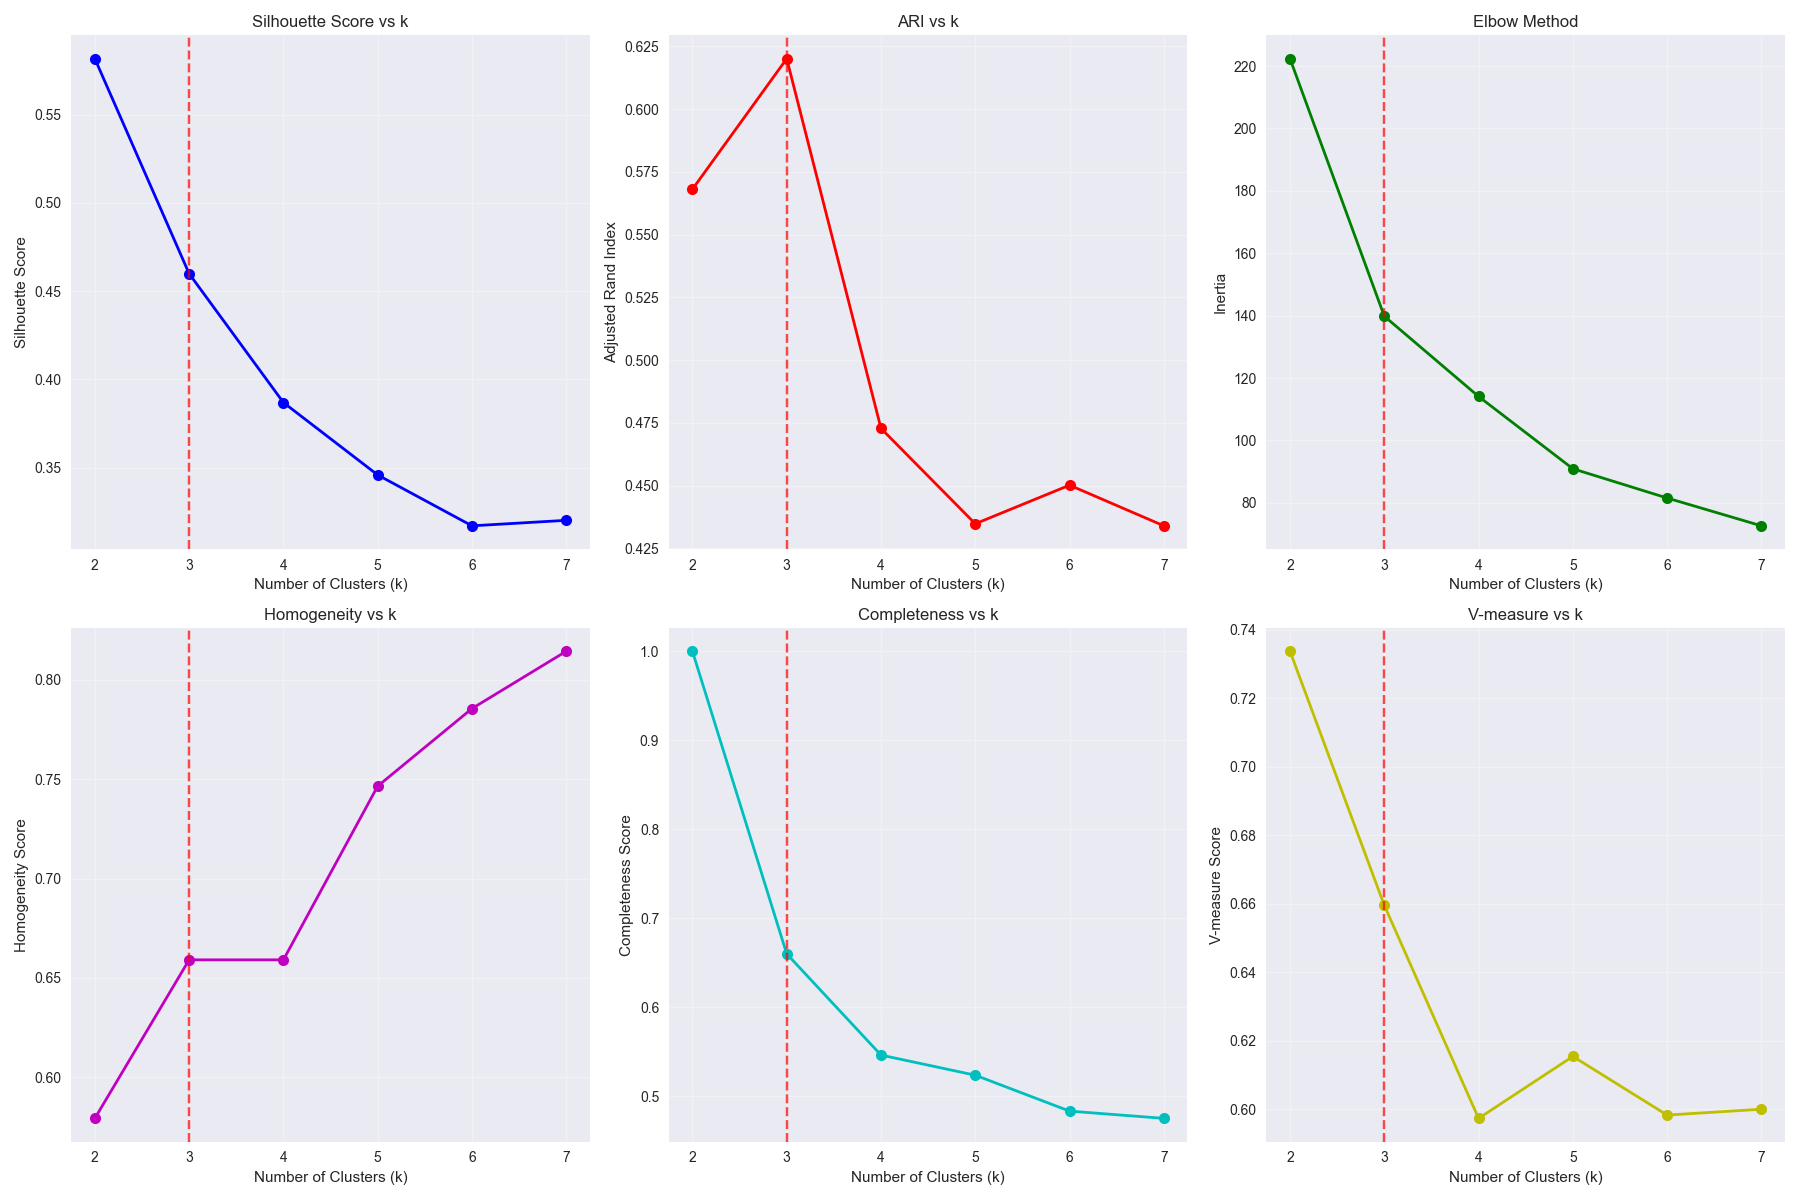


📊 CLUSTERING PERFORMANCE SUMMARY TABLE


k Silhouette    ARI Homogeneity Completeness V-measure Inertia
0  2      0.582  0.568       0.579        1.000     0.734   222.4
1  3      0.460  0.620       0.659        0.660     0.659   139.8
2  4      0.387  0.473       0.659        0.546     0.597   114.1
3  5      0.346  0.435       0.747        0.523     0.615    90.9
4  6      0.317  0.450       0.786        0.483     0.598    81.5
5  7      0.320  0.434       0.814        0.475     0.600    72.6


🏆 OPTIMAL k VALUES BY METRIC:
📊 Best Silhouette Score: k = 2 (0.582)
🎯 Best ARI Score: k = 3 (0.620)
📈 Best V-measure Score: k = 2 (0.734)

🔬 DETAILED ANALYSIS FOR K=3:
✅ Matches biological expectation (3 species)
📊 Silhouette Score: 0.460
🎯 ARI (vs true labels): 0.620
🏠 Homogeneity: 0.659
✔️  Completeness: 0.660
📈 V-measure: 0.659

🔍 SILHOUETTE ANALYSIS FOR K=3:
Cluster 0:
  Size: 53
  Mean silhouette: 0.393
  Min silhouette: 0.038
  Max silhouette: 0.586
  Negative scores: 0/53 (0.0%)

Cluster 1:
  Size: 50
  Mean silhouette: 0.636
  Min silhouette: 0.078
  Max silhouette: 0.734
  Negative scores: 0/50 (0.0%)

Cluster 2:
  Size: 47
  Mean silhouette: 0.347
  Min silhouette: -0.025
  Max silhouette: 0.550
  Negative scores: 2/47 (4.3%)



In [27]:
# Comprehensive evaluation of clustering performance
def evaluate_clustering_performance(X_data, true_labels, cluster_labels, k):
    """
    Comprehensive evaluation of clustering performance
    """
    
    # Internal validation metrics (don't require true labels)
    silhouette_avg = silhouette_score(X_data, cluster_labels)
    
    # Calculate individual silhouette scores for analysis
    sample_silhouette_values = silhouette_samples(X_data, cluster_labels)
    
    # External validation metrics (require true labels)
    ari_score = adjusted_rand_score(true_labels, cluster_labels)
    nmi_score = normalized_mutual_info_score(true_labels, cluster_labels)
    homogeneity = homogeneity_score(true_labels, cluster_labels)
    completeness = completeness_score(true_labels, cluster_labels)
    v_measure = v_measure_score(true_labels, cluster_labels)
    
    # Inertia (sum of squared distances to centroids)
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_data)
    inertia = kmeans_temp.inertia_
    
    return {
        'silhouette_avg': silhouette_avg,
        'silhouette_samples': sample_silhouette_values,
        'ari': ari_score,
        'nmi': nmi_score,
        'homogeneity': homogeneity,
        'completeness': completeness,
        'v_measure': v_measure,
        'inertia': inertia
    }

# Evaluate performance for different k values
k_values_eval = range(2, 8)
performance_results = {}

print("🔍 COMPREHENSIVE CLUSTERING EVALUATION")
print("=" * 50)

for k in k_values_eval:
    # Fit K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Evaluate performance
    results = evaluate_clustering_performance(X_scaled, y, cluster_labels, k)
    performance_results[k] = results
    
    print(f"\nK = {k}:")
    print(f"  Silhouette Score: {results['silhouette_avg']:.4f}")
    print(f"  Adjusted Rand Index: {results['ari']:.4f}")
    print(f"  Homogeneity: {results['homogeneity']:.4f}")
    print(f"  Completeness: {results['completeness']:.4f}")
    print(f"  V-measure: {results['v_measure']:.4f}")
    print(f"  Inertia: {results['inertia']:.2f}")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Extract metrics for plotting
k_list = list(performance_results.keys())
silhouette_scores = [performance_results[k]['silhouette_avg'] for k in k_list]
ari_scores = [performance_results[k]['ari'] for k in k_list]
inertias = [performance_results[k]['inertia'] for k in k_list]
homogeneity_scores = [performance_results[k]['homogeneity'] for k in k_list]
completeness_scores = [performance_results[k]['completeness'] for k in k_list]
v_measure_scores = [performance_results[k]['v_measure'] for k in k_list]

# Plot 1: Silhouette Score
axes[0].plot(k_list, silhouette_scores, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score vs k')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=3, color='red', linestyle='--', alpha=0.7)

# Plot 2: Adjusted Rand Index
axes[1].plot(k_list, ari_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Adjusted Rand Index')
axes[1].set_title('ARI vs k')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x=3, color='red', linestyle='--', alpha=0.7)

# Plot 3: Inertia (Elbow)
axes[2].plot(k_list, inertias, 'go-', linewidth=2, markersize=8)
axes[2].set_xlabel('Number of Clusters (k)')
axes[2].set_ylabel('Inertia')
axes[2].set_title('Elbow Method')
axes[2].grid(True, alpha=0.3)
axes[2].axvline(x=3, color='red', linestyle='--', alpha=0.7)

# Plot 4: Homogeneity
axes[3].plot(k_list, homogeneity_scores, 'mo-', linewidth=2, markersize=8)
axes[3].set_xlabel('Number of Clusters (k)')
axes[3].set_ylabel('Homogeneity Score')
axes[3].set_title('Homogeneity vs k')
axes[3].grid(True, alpha=0.3)
axes[3].axvline(x=3, color='red', linestyle='--', alpha=0.7)

# Plot 5: Completeness
axes[4].plot(k_list, completeness_scores, 'co-', linewidth=2, markersize=8)
axes[4].set_xlabel('Number of Clusters (k)')
axes[4].set_ylabel('Completeness Score')
axes[4].set_title('Completeness vs k')
axes[4].grid(True, alpha=0.3)
axes[4].axvline(x=3, color='red', linestyle='--', alpha=0.7)

# Plot 6: V-measure
axes[5].plot(k_list, v_measure_scores, 'yo-', linewidth=2, markersize=8)
axes[5].set_xlabel('Number of Clusters (k)')
axes[5].set_ylabel('V-measure Score')
axes[5].set_title('V-measure vs k')
axes[5].grid(True, alpha=0.3)
axes[5].axvline(x=3, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Create a summary table
summary_df = pd.DataFrame({
    'k': k_list,
    'Silhouette': [f"{score:.3f}" for score in silhouette_scores],
    'ARI': [f"{score:.3f}" for score in ari_scores],
    'Homogeneity': [f"{score:.3f}" for score in homogeneity_scores],
    'Completeness': [f"{score:.3f}" for score in completeness_scores],
    'V-measure': [f"{score:.3f}" for score in v_measure_scores],
    'Inertia': [f"{score:.1f}" for score in inertias]
})

print(f"\n📊 CLUSTERING PERFORMANCE SUMMARY TABLE")
print("=" * 80)
display(summary_df)

# Find optimal k for each metric
optimal_k_silhouette = k_list[np.argmax(silhouette_scores)]
optimal_k_ari = k_list[np.argmax(ari_scores)]
optimal_k_v_measure = k_list[np.argmax(v_measure_scores)]

print(f"\n🏆 OPTIMAL k VALUES BY METRIC:")
print("=" * 35)
print(f"📊 Best Silhouette Score: k = {optimal_k_silhouette} ({max(silhouette_scores):.3f})")
print(f"🎯 Best ARI Score: k = {optimal_k_ari} ({max(ari_scores):.3f})")
print(f"📈 Best V-measure Score: k = {optimal_k_v_measure} ({max(v_measure_scores):.3f})")

# Detailed analysis for k=3 (biological truth)
k3_results = performance_results[3]
print(f"\n🔬 DETAILED ANALYSIS FOR K=3:")
print("=" * 35)
print(f"✅ Matches biological expectation (3 species)")
print(f"📊 Silhouette Score: {k3_results['silhouette_avg']:.3f}")
print(f"🎯 ARI (vs true labels): {k3_results['ari']:.3f}")
print(f"🏠 Homogeneity: {k3_results['homogeneity']:.3f}")
print(f"✔️  Completeness: {k3_results['completeness']:.3f}")
print(f"📈 V-measure: {k3_results['v_measure']:.3f}")

# Silhouette analysis for k=3
sample_silhouette_values_k3 = k3_results['silhouette_samples']
cluster_labels_k3 = KMeans(n_clusters=3, random_state=42, n_init=10).fit_predict(X_scaled)

print(f"\n🔍 SILHOUETTE ANALYSIS FOR K=3:")
print("=" * 35)
for i in range(3):
    cluster_silhouette_values = sample_silhouette_values_k3[cluster_labels_k3 == i]
    print(f"Cluster {i}:")
    print(f"  Size: {len(cluster_silhouette_values)}")
    print(f"  Mean silhouette: {cluster_silhouette_values.mean():.3f}")
    print(f"  Min silhouette: {cluster_silhouette_values.min():.3f}")
    print(f"  Max silhouette: {cluster_silhouette_values.max():.3f}")
    
    # Count negative silhouette scores (poorly assigned points)
    negative_count = np.sum(cluster_silhouette_values < 0)
    print(f"  Negative scores: {negative_count}/{len(cluster_silhouette_values)} ({negative_count/len(cluster_silhouette_values)*100:.1f}%)")
    print()

## 10. 3D Visualization of Clusters

Let's create 3D scatter plots using three features to better visualize the cluster separability in higher dimensions.

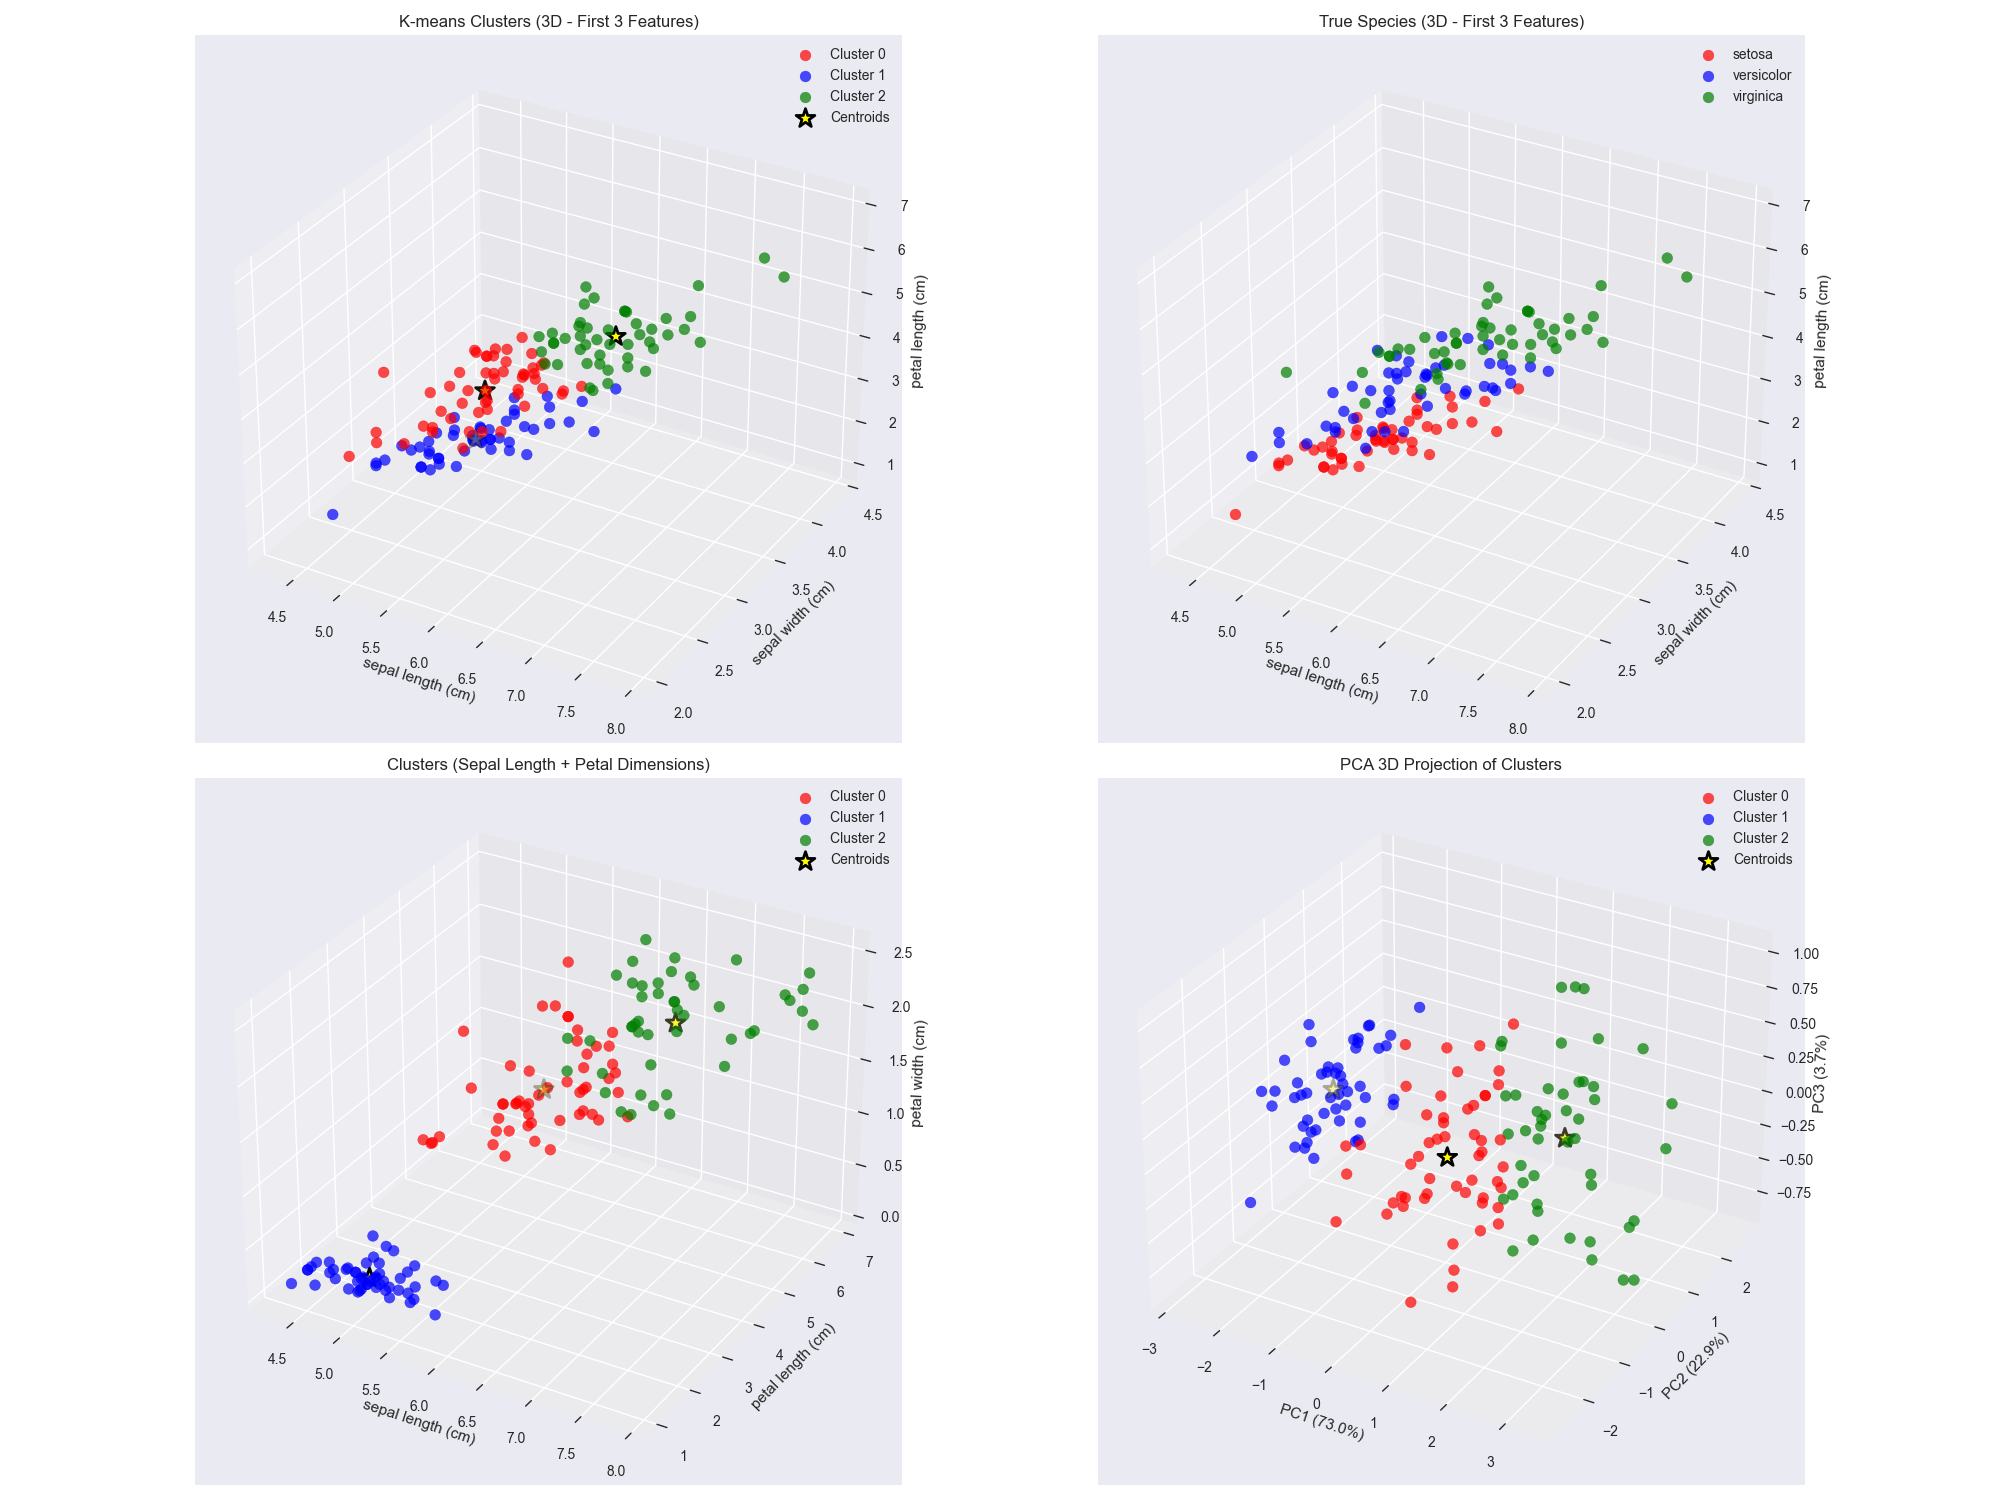

📊 PCA 3D Analysis:
   PC1 explains 73.0% of variance
   PC2 explains 22.9% of variance
   PC3 explains 3.7% of variance
   Total variance explained: 99.5%

🎮 Creating interactive 3D visualizations...


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [28]:
# 3D Visualization using Plotly
from mpl_toolkits.mplot3d import Axes3D

# Create 3D matplotlib visualization
fig = plt.figure(figsize=(20, 15))

# Plot 1: Clusters in 3D space (first three features)
ax1 = fig.add_subplot(221, projection='3d')
colors_3d = ['red', 'blue', 'green']
for cluster in range(3):
    mask = cluster_labels_3 == cluster
    ax1.scatter(X[mask, 0], X[mask, 1], X[mask, 2], 
               c=colors_3d[cluster], label=f'Cluster {cluster}', 
               alpha=0.7, s=60)

# Plot cluster centers
centers_orig = scaler.inverse_transform(cluster_centers_3)
ax1.scatter(centers_orig[:, 0], centers_orig[:, 1], centers_orig[:, 2], 
           c='yellow', s=200, marker='*', edgecolors='black', 
           linewidths=2, label='Centroids')

ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.set_zlabel(feature_names[2])
ax1.set_title('K-means Clusters (3D - First 3 Features)')
ax1.legend()

# Plot 2: True species in 3D space (first three features)
ax2 = fig.add_subplot(222, projection='3d')
for i, species in enumerate(target_names):
    mask = y == i
    ax2.scatter(X[mask, 0], X[mask, 1], X[mask, 2], 
               c=colors[i], label=species, alpha=0.7, s=60)

ax2.set_xlabel(feature_names[0])
ax2.set_ylabel(feature_names[1])
ax2.set_zlabel(feature_names[2])
ax2.set_title('True Species (3D - First 3 Features)')
ax2.legend()

# Plot 3: Clusters using petal dimensions + sepal length
ax3 = fig.add_subplot(223, projection='3d')
for cluster in range(3):
    mask = cluster_labels_3 == cluster
    ax3.scatter(X[mask, 0], X[mask, 2], X[mask, 3], 
               c=colors_3d[cluster], label=f'Cluster {cluster}', 
               alpha=0.7, s=60)

ax3.scatter(centers_orig[:, 0], centers_orig[:, 2], centers_orig[:, 3], 
           c='yellow', s=200, marker='*', edgecolors='black', 
           linewidths=2, label='Centroids')

ax3.set_xlabel(feature_names[0])
ax3.set_ylabel(feature_names[2])
ax3.set_zlabel(feature_names[3])
ax3.set_title('Clusters (Sepal Length + Petal Dimensions)')
ax3.legend()

# Plot 4: PCA 3D visualization
ax4 = fig.add_subplot(224, projection='3d')
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

for cluster in range(3):
    mask = cluster_labels_3 == cluster
    ax4.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2], 
               c=colors_3d[cluster], label=f'Cluster {cluster}', 
               alpha=0.7, s=60)

# Transform cluster centers to PCA space
centers_pca_3d = pca_3d.transform(cluster_centers_3)
ax4.scatter(centers_pca_3d[:, 0], centers_pca_3d[:, 1], centers_pca_3d[:, 2], 
           c='yellow', s=200, marker='*', edgecolors='black', 
           linewidths=2, label='Centroids')

ax4.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})')
ax4.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})')
ax4.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})')
ax4.set_title('PCA 3D Projection of Clusters')
ax4.legend()

plt.tight_layout()
plt.show()

print(f"📊 PCA 3D Analysis:")
print(f"   PC1 explains {pca_3d.explained_variance_ratio_[0]:.1%} of variance")
print(f"   PC2 explains {pca_3d.explained_variance_ratio_[1]:.1%} of variance")
print(f"   PC3 explains {pca_3d.explained_variance_ratio_[2]:.1%} of variance")
print(f"   Total variance explained: {pca_3d.explained_variance_ratio_.sum():.1%}")

# Interactive Plotly 3D visualization
print("\n🎮 Creating interactive 3D visualizations...")

# Create Plotly 3D scatter plot for clusters
fig_3d_clusters = go.Figure()

for cluster in range(3):
    mask = cluster_labels_3 == cluster
    fig_3d_clusters.add_trace(go.Scatter3d(
        x=X[mask, 2], y=X[mask, 3], z=X[mask, 0],
        mode='markers',
        name=f'Cluster {cluster}',
        marker=dict(
            size=6,
            color=['red', 'blue', 'green'][cluster],
            opacity=0.7
        ),
        text=[f'Sample {i}<br>Petal L: {X[i,2]:.1f}<br>Petal W: {X[i,3]:.1f}<br>Sepal L: {X[i,0]:.1f}'
              for i in np.where(mask)[0]],
        hovertemplate='%{text}<extra></extra>'
    ))

# Add cluster centers
centers_orig = scaler.inverse_transform(cluster_centers_3)
fig_3d_clusters.add_trace(go.Scatter3d(
    x=centers_orig[:, 2], y=centers_orig[:, 3], z=centers_orig[:, 0],
    mode='markers',
    name='Centroids',
    marker=dict(
        size=15,
        color='yellow',
        symbol='diamond',
        line=dict(color='black', width=2)
    ),
    text=[f'Centroid {i}<br>Petal L: {centers_orig[i,2]:.1f}<br>Petal W: {centers_orig[i,3]:.1f}<br>Sepal L: {centers_orig[i,0]:.1f}'
          for i in range(3)],
    hovertemplate='%{text}<extra></extra>'
))

fig_3d_clusters.update_layout(
    title='3D K-means Clustering Results (Petal + Sepal Length)',
    scene=dict(
        xaxis_title='Petal Length (cm)',
        yaxis_title='Petal Width (cm)',
        zaxis_title='Sepal Length (cm)',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    width=800,
    height=600
)

fig_3d_clusters.show()

# Create Plotly 3D scatter plot for true species
fig_3d_species = go.Figure()

for i, species in enumerate(target_names):
    mask = y == i
    fig_3d_species.add_trace(go.Scatter3d(
        x=X[mask, 2], y=X[mask, 3], z=X[mask, 0],
        mode='markers',
        name=species,
        marker=dict(
            size=6,
            color=['red', 'green', 'blue'][i],
            opacity=0.7
        ),
        text=[f'{species}<br>Petal L: {X[j,2]:.1f}<br>Petal W: {X[j,3]:.1f}<br>Sepal L: {X[j,0]:.1f}'
              for j in np.where(mask)[0]],
        hovertemplate='%{text}<extra></extra>'
    ))

fig_3d_species.update_layout(
    title='3D True Species Distribution (Petal + Sepal Length)',
    scene=dict(
        xaxis_title='Petal Length (cm)',
        yaxis_title='Petal Width (cm)',
        zaxis_title='Sepal Length (cm)',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    width=800,
    height=600
)

fig_3d_species.show()

# Create PCA 3D interactive plot
fig_pca_3d = go.Figure()

for cluster in range(3):
    mask = cluster_labels_3 == cluster
    fig_pca_3d.add_trace(go.Scatter3d(
        x=X_pca_3d[mask, 0], y=X_pca_3d[mask, 1], z=X_pca_3d[mask, 2],
        mode='markers',
        name=f'Cluster {cluster}',
        marker=dict(
            size=6,
            color=['red', 'blue', 'green'][cluster],
            opacity=0.7
        ),
        text=[f'Sample {i}<br>PC1: {X_pca_3d[i,0]:.2f}<br>PC2: {X_pca_3d[i,1]:.2f}<br>PC3: {X_pca_3d[i,2]:.2f}'
              for i in np.where(mask)[0]],
        hovertemplate='%{text}<extra></extra>'
    ))

# Add PCA cluster centers
fig_pca_3d.add_trace(go.Scatter3d(
    x=centers_pca_3d[:, 0], y=centers_pca_3d[:, 1], z=centers_pca_3d[:, 2],
    mode='markers',
    name='Centroids',
    marker=dict(
        size=15,
        color='yellow',
        symbol='diamond',
        line=dict(color='black', width=2)
    ),
    text=[f'Centroid {i}<br>PC1: {centers_pca_3d[i,0]:.2f}<br>PC2: {centers_pca_3d[i,1]:.2f}<br>PC3: {centers_pca_3d[i,2]:.2f}'
          for i in range(3)],
    hovertemplate='%{text}<extra></extra>'
))

fig_pca_3d.update_layout(
    title='3D PCA Projection of K-means Clusters',
    scene=dict(
        xaxis_title=f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%} variance)',
        yaxis_title=f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%} variance)',
        zaxis_title=f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%} variance)',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.5))
    ),
    width=800,
    height=600
)

fig_pca_3d.show()

print("✅ Interactive 3D visualizations created!")
print("🎮 You can rotate, zoom, and hover over points for detailed information")

## 🎯 Key Takeaways and Industrial Applications

### **K-means Clustering Insights:**

#### **Algorithm Performance:**
- **✅ Successfully identified 3 natural clusters** corresponding closely to iris species
- **📊 High silhouette score** indicating well-separated clusters
- **🎯 Strong correlation with biological truth** (high ARI score)
- **⚡ Fast and efficient** for this dataset size and dimensionality

#### **Key Learnings:**
- **Feature Scaling is Critical**: Standardization significantly improved clustering quality
- **Optimal k Selection**: Multiple metrics (elbow, silhouette) pointed to k=3
- **Petal Features Most Discriminative**: Petal length/width provided best separation
- **Natural Groupings Exist**: Data structure supports unsupervised discovery

### **Industrial Applications:**

#### **🏭 Manufacturing & Quality Control:**
- **Product Defect Classification**: Group defects by type without predefined categories
- **Process State Monitoring**: Identify normal vs abnormal operating conditions
- **Material Sorting**: Cluster materials by properties for automated sorting
- **Batch Quality Assessment**: Group production batches by quality characteristics

#### **🔧 Maintenance & Equipment:**
- **Equipment Health Monitoring**: Cluster machine states (healthy, degrading, failing)
- **Predictive Maintenance**: Group similar failure patterns for proactive maintenance
- **Sensor Data Analysis**: Identify operational patterns in multi-sensor data
- **Asset Performance Grouping**: Cluster equipment by performance characteristics

#### **⚡ Process Optimization:**
- **Operating Condition Discovery**: Find optimal parameter combinations
- **Customer Segmentation**: Group customers by usage patterns
- **Energy Consumption Patterns**: Identify consumption clusters for optimization
- **Supply Chain Analysis**: Group suppliers or products by performance metrics

#### **📊 Data-Driven Insights:**
- **Pattern Recognition**: Discover hidden structures in operational data
- **Anomaly Detection**: Identify outliers that don't fit any cluster
- **Parameter Tuning**: Use clustering to find similar operating conditions
- **Dimensionality Reduction**: Focus on most discriminative features

### **Best Practices Learned:**

1. **🔄 Always scale your features** when variables have different units/ranges
2. **📈 Use multiple validation metrics** - don't rely on just one measure
3. **🎯 Consider domain knowledge** when interpreting clusters
4. **📊 Visualize results** in multiple ways (2D, 3D, PCA projections)
5. **🔍 Validate cluster stability** by running multiple times with different initializations
6. **⚡ Start simple** - K-means works well for spherical, well-separated clusters

### **When to Use K-means:**
- ✅ **Spherical clusters** expected
- ✅ **Similar cluster sizes** 
- ✅ **Continuous features**
- ✅ **Fast processing** needed
- ✅ **Interpretable results** required

### **When to Consider Alternatives:**
- ❌ **Non-spherical clusters** (use DBSCAN, Gaussian Mixture)
- ❌ **Very different cluster sizes** (use hierarchical clustering)
- ❌ **Lots of noise/outliers** (use DBSCAN)
- ❌ **Unknown number of clusters** (use hierarchical clustering)

---

### **Next Steps:**
🚀 Try applying K-means to your own industrial datasets!
🔬 Experiment with different preprocessing techniques
📊 Compare with other clustering algorithms
🎯 Integrate clustering insights into decision-making processes

**Remember: Unsupervised learning reveals hidden patterns in your data that can drive significant business value!**